# Notebook 6 - Neural Networks (MLP)

CSI4106 Artificial Intelligence  
Fall 2021. \
Version 1 (2020) prepared by Julian Templeton and Caroline Barrière.  Version 2 (2021) modified by Caroline Barrière.

***INTRODUCTION***:  

We are going into the medical domain for this notebook. The supervised classification task tackled in this notebook is about diabetes patient readmission to a hospital, provided a certain set of features describing their physical state, the procedure they went through during their stay, the medications they take, etc.

Any *readmitted patient* is very costly for a medical system. It shows to some extent, that the patient was discharged before having fully recovered. The dataset we explore splits readmission into 3 values: before 30 days, after 30 days, and none.  Understanding what conditions brings patients back to the hospital within 30 days is very important for a medical system, as these cases should be minimized.

This notebook will allow you to pursue your understanding of experimental set-up for supervised machine learning, in particular supervised classification through the use of multi-layer perceptrons.

We will make use of three packages: (1) **scikit-learn**, a great machine learning package, which you've experimented with in the last notebook, (2) **pandas**, a must-have for data science, and (3) **matplotlib** which is a great plotting library (pip install matplotlib).  Make sure you have the LATEST version of scikit-learn (at least version >= 0.20), otherwise some functions (the one-hot-encoder) will not work.

As mentioned for the previous notebooks, you always have the option of using Colab if a local installation causes you problems.

*PLEASE NOTE:* As this is your 6th notebook this semester, some instructions will be a bit less explicit and may require looking at some online official documentation. You are also given more freedom in the way you code your answers. If you make any assumptions to answer some questions, make sure to state them, so they will be taken into account by the correctors.

***HOMEWORK***:  
Go through the notebook by running each cell, one at a time.  

Look for **(TO DO)** for the tasks that you need to perform. Do not edit the code outside of the questions which you are asked to answer unless specifically asked. Once you're done, sign the notebook, change the name to StudentNumber-LastName-Notebook6.ipynb, and submit it.  

*The notebook will be marked on 30.  
Each **(TO DO)** has a number of points associated with it.*
***

**1. Obtaining the dataset**

First, read the description of the dataset on Diabetes Readmission (https://www.kaggle.com/brandao/diabetes).

Next download the dataset from the UCI archive (click *Data Folder* --> download *dataset_diabetes.zip*):
https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

Unzip the file *dataset_diabetes.zip* and there should be a file called *diabetic_data.csv* which we will use for our experiments. 

**2. Exploring the dataset**  
We will use the package *pandas* to read the csv file. Pandas will create a data structure called a dataframe, which will contain all the data. 

If you get some errors when you import the packages, it's because they are not installed... make sure you do *pip install package_name* (or whichever method you have been using to install the packages) at the command prompt to have access to these packages.

In [293]:
# Import the required packages for data analysis and machine learning
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

The following code reads the csv file into a dataframe and shows the top ten rows from the read data.  
Note that ? means that the value is *missing* from the dataset for a particular attribute.  
We then look at all the attributes (to understand their meaning, refer to the Kaggle site, as mentioned in the introduction).

In [294]:
# Read the dataset, show top ten rows
X = pd.read_csv("diabetic_data.csv")
X.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [295]:
# Show all attributes
list(X)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [296]:
# Examples of data exploration
print(X.shape)
print(X['race'].value_counts())

(101766, 50)
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


**(TO DO) Q1 - 3 marks**  
Inspired by the code above, *write code* to answer the following questions (not just manually printing a number without finding that number in the code). Your code must help in finding the answer. Print the question that you are answering along with the answer that the code helped find.

1. How many examples are in the dataset?
2. What are the prior probabilities of each class (NO, <30, >30)?
3. What are the possible ranges (including ?) for the attribute weight, and the number of examples in each?


In [297]:
# ANSWER Q1 - 
### Your code which answers the three questions.

# 1:
print("Number of examples in data set: ")
print(X.shape[0])
# 2:
print("\nPrior probabilities of each class")
print(X['readmitted'].value_counts(normalize=True))
# 3:
print("\nPossible ranges weight and the number of examples for each range")
X['weight'].value_counts()

Number of examples in data set: 
101766

Prior probabilities of each class
NO     0.539119
>30    0.349282
<30    0.111599
Name: readmitted, dtype: float64

Possible ranges weight and the number of examples for each range


?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

**3. Feature Selection**  
Now that we have taken a look into our data, we should decide which features would be suitable to use with our model.

Feature selection is just as important as tuning a model (choosing hyperparameters such as the number of layers and their sizes). We need to be sure to choose high quality features that best represent our data in order to maximize the performance of our model. Simply putting every feature or selecting some without analyzing them may provide worse results. Thus, we need to consider which features to use by looking at the data itself to see if it would be a good match.

Some issues when working with data include:
1. Is the data well distributed? That is, does it contain enough variety to provide a good split on the data.
2. Are there missing values? The more missing values --> the less well these will work as features for many Machine Learning algorithms. Here, we will not focus on this issue, but it is important to know.
3. Does the feature values (continuous, discrete) work well with our selected algorithm? (that we can transform).

**(TO DO) Q2 - 4 marks**   
As you saw previously when listing all the features, there are many of them.  We do not have time, within this notebeook, to explore them all.  Therefore, we preselected 4 of them for you to analyse:  
1. gender 
2. age 
3. weight 
4. num_medications

Explore each of the specified features by:   

1) Plotting the distribution (histogram using kind="hist" for numerical data or bar plots using kind="barh" for categorical/discrete data) and write if the data is well distributed. For more information on histograms, in case this is a newer concept, you can look at this link: https://datagy.io/histogram-python/  
2) Identifying the number of missing/unknown/invalid values

Remember, if you have any assumptions that you need to state, state them.

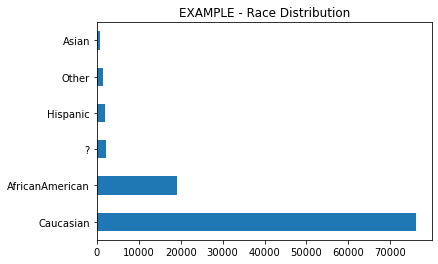

(Example.1): Is the above output well distributed? No it is not. This feature is highly imbalanced.
(Example.2): There are 2273 missing values labelled as '?'.


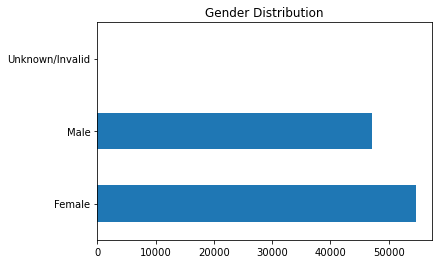

(1.1): Is the feature 'gender' well distributed? Yes, it is well distributed. However, this feature has a slight imbalance where there are slightly more examples of females occurring.
(1.2): Assuming that Unknown/Invalid is not a gender and indicates a missing value. There are 3 missing values labelled as Unknown/Invalid


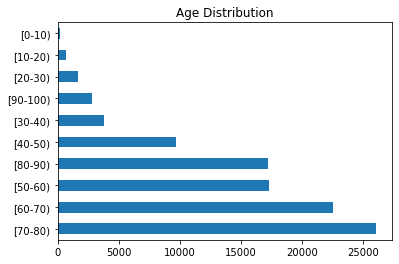

(2.1): Is the feature 'age' well distributed? No, it is not. The number of examples seem to increase as the age range increases, with the majority occuring in the range 70-80. Thus, creating an imbalance.
(2.2): There are no missing values for the class age


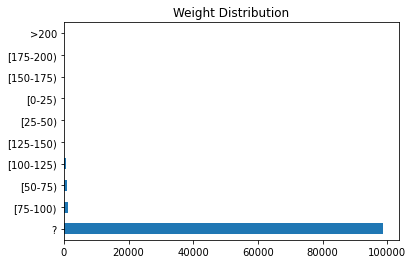

(3.1): Is the feature 'weight' well distributed? No, it is not. The feature is highly imbalanced because a large portion of its examples are missing values labelled ?
(3.2): There are 98569 missing values labelled as ?


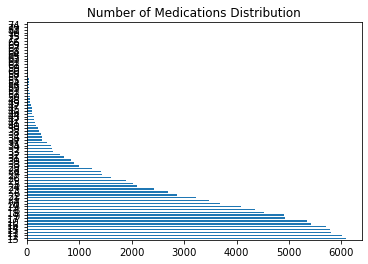

(4.1): Is the feature 'num_medications' well distributed? No it is not. A large portion of the distribution tends towards more occurrences of a lower value for num_medications
(4.2): There are no missing values for num_medications


In [298]:
# ANSWER Q2 -

# Example for the feature "race"
plt.figure() # Creates a new figure
X["race"].value_counts().plot(kind="barh", title="EXAMPLE - Race Distribution")
plt.show()
print("(Example.1): Is the above output well distributed? No it is not. This feature is highly imbalanced.")
print("(Example.2): There are 2273 missing values labelled as '?'.")

# MODIFY AND ANSWER THE BELOW BASED ON THE EXAMPLE ABOVE.  
# Also, instead of just saying balanced/imbalanced, try to add why?

# gender
X["gender"].value_counts().plot(kind="barh", title="Gender Distribution")
plt.show()
print("(1.1): Is the feature 'gender' well distributed? Yes, it is well distributed. However, this feature has a slight imbalance where there are slightly more examples of females occurring.")
print("(1.2): Assuming that Unknown/Invalid is not a gender and indicates a missing value. There are {} missing values labelled as Unknown/Invalid".format(X[X["gender"]=="Unknown/Invalid"].shape[0]))

# age
X["age"].value_counts().plot(kind="barh", title="Age Distribution")
plt.show()
print("(2.1): Is the feature 'age' well distributed? No, it is not. The number of examples seem to increase as the age range increases, with the majority occuring in the range 70-80. Thus, creating an imbalance.")
print("(2.2): There are no missing values for the class age")

# weight
X["weight"].value_counts().plot(kind="barh", title="Weight Distribution")
plt.show()
print("(3.1): Is the feature 'weight' well distributed? No, it is not. The feature is highly imbalanced because a large portion of its examples are missing values labelled ?")
print("(3.2): There are 98569 missing values labelled as ?")

# num_medications
X["num_medications"].value_counts().plot(kind="barh", title="Number of Medications Distribution")
plt.show()
print("(4.1): Is the feature 'num_medications' well distributed? No it is not. A large portion of the distribution tends towards more occurrences of a lower value for num_medications")
print("(4.2): There are no missing values for num_medications")

**4. Preparing the dataset for experimentation**

We will do a few steps to prepare the data for experimentations:  \

(1) extracting the class we wish to predict \
(2) splitting the dataset into a training and a validation set (called a test set in sklearn) \
(3) define a subset of features to work with \
(4) perform one-hot-encoding for discrete features

In [299]:
# This can ONLY BE DONE ONCE, as we pop the values into a new variable to be used as predicted class
y = X.pop("readmitted").values

In [300]:
# split the large dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
# Look at the shape of the outputs
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(81412, 49)
(81412,)
(20354, 49)
(20354,)


In [241]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# Setting up our one-hot encoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Since the dataset is quite large, try with a subset of features
featureSet = ['race','gender','age', 'weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
 'num_medications']

# Make a copy of the training set containing only the chosen features
X_train_sf = X_train[featureSet].copy()
X_test_sf = X_test[featureSet].copy()

# IF you wanted to try with the full dataset, try to redo the steps with this (optional - takes a lot of time)
# X_train_allf = X_train[:].copy()
# X_test_allf = X_test[:].copy()

# Perform the one-hot encoding using our one-hot encoder on the selected feature set
ohe.fit(X_train_sf)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [242]:
# The one-hot-encoder renames the features. Let's take a look at the new names.
feature_names = ohe.get_feature_names()
print(feature_names)

['x0_?' 'x0_AfricanAmerican' 'x0_Asian' 'x0_Caucasian' 'x0_Hispanic'
 'x0_Other' 'x1_Female' 'x1_Male' 'x1_Unknown/Invalid' 'x2_[0-10)'
 'x2_[10-20)' 'x2_[20-30)' 'x2_[30-40)' 'x2_[40-50)' 'x2_[50-60)'
 'x2_[60-70)' 'x2_[70-80)' 'x2_[80-90)' 'x2_[90-100)' 'x3_>200' 'x3_?'
 'x3_[0-25)' 'x3_[100-125)' 'x3_[125-150)' 'x3_[150-175)' 'x3_[175-200)'
 'x3_[25-50)' 'x3_[50-75)' 'x3_[75-100)' 'x4_1' 'x4_2' 'x4_3' 'x4_4'
 'x4_5' 'x4_6' 'x4_7' 'x4_8' 'x4_9' 'x4_10' 'x4_11' 'x4_12' 'x4_13'
 'x4_14' 'x5_1' 'x5_2' 'x5_3' 'x5_4' 'x5_5' 'x5_6' 'x5_7' 'x5_8' 'x5_9'
 'x5_10' 'x5_11' 'x5_12' 'x5_13' 'x5_14' 'x5_15' 'x5_16' 'x5_17' 'x5_18'
 'x5_19' 'x5_20' 'x5_21' 'x5_22' 'x5_23' 'x5_24' 'x5_25' 'x5_26' 'x5_27'
 'x5_28' 'x5_29' 'x5_30' 'x5_31' 'x5_32' 'x5_33' 'x5_34' 'x5_35' 'x5_36'
 'x5_37' 'x5_38' 'x5_39' 'x5_40' 'x5_41' 'x5_42' 'x5_43' 'x5_44' 'x5_45'
 'x5_46' 'x5_47' 'x5_48' 'x5_49' 'x5_50' 'x5_51' 'x5_52' 'x5_53' 'x5_54'
 'x5_55' 'x5_56' 'x5_57' 'x5_58' 'x5_59' 'x5_60' 'x5_61' 'x5_62' 'x5_63'
 'x5_64

In [243]:
# We can now encode the training and test set with the new features
X_train_sf_encoded = ohe.transform(X_train_sf)
X_test_sf_encoded = ohe.transform(X_test_sf)

**(TO DO) Q3 - 1 mark**   
 
1.   How many features are there now, after the one-hot-encoder?
2.   Why so many? 
3.   Show the shape of the training set now.

In [301]:
# ANSWER Q3 -
# How many features are there now after encoding (write a line of code)
print("Number of features after encoding: {}".format(X_train_sf_encoded.shape[1]))
# Why so many?
print("There are many features because one-hot encoding creates a new feature vector for each class per a categorical variable")
# Show the shape of the training set after the one-hot encoding. (write a line of code)
X_train_sf_encoded.shape

Number of features after encoding: 242
There are many features because one-hot encoding creates a new feature vector for each class per a categorical variable


(81412, 242)

**5. Baseline model**  
Now that we have setup our encoded features we will start by using a Logistic Regression Classifier to perform supervised learning on our dataset.

***5.1 Defining the Logistic Regression Classifier***   
First we will define our Logistic Regression Classifier with scikit learn.  Since we have 3 classes for readmission prediction (before 30 days, after 30 days, and none), we define our classifier as a multinomial classifier (see below the parameter multi_class).

In [245]:
# Import the Logistic Regression model from scikit and matplot
from sklearn.linear_model import LogisticRegression
import datetime

In [246]:
# Define the model
clf_lr = LogisticRegression(solver='lbfgs', multi_class="multinomial", random_state=1, warm_start=True)

As you see above, the solver we use is the 'lbfgs' which is more complex than the 'sgd' (stochastic gradient descent) which we saw in the video lectures last week and this week. 

We will use 'sgd' later on in the notebook (also available in sklearn), but for now, we will use the 'lbfgs' which uses optimization techniques to converge more rapidly toward a set of weights that minimize the error.

With such solver, the 'fit' function (clf_mlp.fit) needs to be repeated a certain number of epochs. An *epoch* is defined as going through all the training data once. Think of an epoch as the same as the number of iterations through all the training data, as we saw for 'sgd' in the lectures.

Also, to make sure the weights are not reinitialized at random after each epoch, it's important to set warm_start to True.

***5.2 Training the Logistic Regression Classifier***  
Now that the model is defined, we need to train our model with the training set to learn how to classify our target class *readmitted*.  See how our *train_model* function requires a loop representing the number of epochs, which we set at 10 by default.

In [247]:
# This function trains a given model and returns a list of scores
#   clf:     The untrained model to train
#   X_train: The encoded attributes of the training set
#   y_train: The target values of the training set
def train_model(clf, X_train, y_train, epochs=10):
    scores = []
    print("Starting training...")
    for i in range(1, epochs + 1):
        print("Epoch:" + str(i) + "/" + str(epochs) + " -- " + str(datetime.datetime.now()))
        clf.fit(X_train, y_train)
        score = clf.score(X_train, y_train)
        scores.append(score)
    print("Done training.")
    return scores

In [248]:
import warnings
warnings.filterwarnings('ignore')
# Now let's train the model (recall that we use the training set)
# We run for only one epoch and will only get one score
clf_lr_scores = train_model(clf_lr, X_train_sf_encoded, y_train, 1)
print(clf_lr_scores)


Starting training...
Epoch:1/1 -- 2021-11-02 02:00:12.247498
Done training.
[0.5432368692576033]


**(TO DO) Q4 - 1 mark**   
Looking at the function train_model, what is the *score* (clf.score())? You may need to look at the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for the LogisticRegression to understand this. 

What is the score obtained and what does it represent?

**ANSWER - Q4**

Score obtained is 0.5432368692576033\
The score is the mean accuracy on the given train set and labels. In other words, it is the the mean accuracy of how each sample set for each label set was correctly predicted.

**(TO DO) Q5 - 2 marks**   
For this question, first run the code below.  Then describe what the code does. 
Afterwards, give the accuracy of the printed results (just manually state it, no need to code).

In [254]:
# Show the prediction on the first 10 examples
y_predicted = clf_lr.predict(X_train_sf_encoded[0:10])
print(y_predicted)
print(y_train[0:10])
clf_lr.predict_proba(X_train_sf_encoded[0:10])

['NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']
['>30' 'NO' 'NO' 'NO' '>30' '<30' '<30' '<30' '>30' '>30']


array([[0.06578887, 0.32106479, 0.61314633],
       [0.08641421, 0.27137347, 0.64221232],
       [0.06805648, 0.3504513 , 0.58149222],
       [0.1221325 , 0.3446279 , 0.5332396 ],
       [0.09654131, 0.30064441, 0.60281428],
       [0.11759051, 0.35975672, 0.52265278],
       [0.08787222, 0.34883324, 0.56329454],
       [0.08040364, 0.29163956, 0.62795679],
       [0.09662839, 0.35250772, 0.55086388],
       [0.17717523, 0.40985769, 0.41296709]])

**ANSWER Q5 -**

1) Describe what y_predicted is: the prediction of the first ten examples for the training set\
2) Describe what y_train[0:10] is: the expected result (or the gold standard) for the first ten examples of the training set\
3) Describe clf_lr.predict_proba(X_train_sf_encoded[0:10]): This returns the predicted probability of each class (NO, >30, <30) for the first 10 examples of the training set.  \
4) What is the accuracy of the printed results? (manually calculated)
The accuracy for the printed results is 3/10 = 0.3

**5.3 Testing the Logistic Regression Model**   
Now that we have our trained model, let's test it on the test set.

**(TO DO) Q6 - 2 marks**   
Evaluate the model on the test set by computing it's *score* (recall how the score is computed when training) and compare that to the training set scores (you have this value from clf_lr_scores). Print which is better and give one reason why these results may have ended up this way.

In [306]:
# ANSWER Q6

# The test set is encoded in here: X_test_sf_encoded
# Need to compute test score, print it, compare to train score, and print which is better and why
y_predicted_t = clf_lr.predict(X_test_sf_encoded)
test_score = clf_lr.score(X_test_sf_encoded, y_test)
print("Test set score: {} \nTraining set score: {}".format(test_score, clf_lr_scores[0]))

print("The training set score is better than the test set score by approximately 0.0034.")
print("This is because the model will usually produce a more optimistic prediction when used on the data it was trained on.")

Test set score: 0.5398447479610887 
Training set score: 0.5432368692576033
The training set score is better than the test set score by approximately 0.0034.
This is because the model will usually produce a more optimistic prediction when used on the data it was trained on.


**6. MLP**   
We now work with a Multi Layer Perceptron Classifier to perform supervised learning on our dataset. We will be able to compare it to our baseline approach (logistic regression).

***6.1 Defining the MLPClassifier***   
First we will define our MLPClassifier with scikit learn.  We define a network with a single hidden layer of 100 nodes (see parameter hidden_layer_sizes).

In [261]:
# Import the MLP model from scikit and matplot
from sklearn.neural_network import MLPClassifier

In [262]:
# Define the model
clf_mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100), random_state=1, warm_start=True)

As you see above, we use again the 'lbfgs' solver.  The same as for the logistic regression, with such solver, the 'fit' function (clf_mlp.fit) needs to be repeated a certain number of epochs.  

Also, many parameters, available for the MLPClassifier, do not apply when using 'lbfgs', so for now, we are using the defaults.  We will discuss parameters later when we go back to 'sgd'.

***6.2 Training, Testing, and Discussing the MLPClassifier***  
Now that the model is defined, we need to train our model with the train set to learn how to classify our target class *readmitted*. We will plot our retrieved scores, discuss them, and compare them with with the Baseline Model.

In [263]:
# Plots the train and the test scores
def plotScores(scores_train, scores_test):
    # Plot the points
    plt.plot([i for i in range(len(scores_train))], scores_train)
    plt.plot([i for i in range(len(scores_test))], scores_test)
    # Setup the legend
    plt.legend(["Train scores", "Test Scores"])
    # Labels for the x and y axis
    plt.ylabel("Score")
    plt.xlabel("Epoch")
    plt.show()

**(TO DO) Q7 - 7 marks**   

***For all parts of this question, ensure that you have the full, correct output in your submission (do not clear the output here).***

1. You must define the function train_and_evaluate() below. This function must take as input a classifier, the training set, the testing set, and the number of epochs. Inspired from the provided function train_model(), train the model as usual (use 10 epochs as the default), but now track the scores from both the train and the test sets at each epoch. Return both of these results.  
2. Once defined, train clf_mlp with train_and_evaluate() for ten epochs.  PLEASE NOTE: this training might take a while depending on your machine (could be 2-3 minutes per epoch).
3. Take the MLPClassifier results and plot them with the plotting function above (*plotScores*).   
4. Describe the behaviour of the scores found during the training. Did the train or the test set produce the best results? What do these results mean? 
5. Did the MLP do better or worse than the Baseline Logistic Regression Model (and by how much)? Why do you think that it did better/worse?


In [265]:
# ANSWER Q7 - part 1 - Create the train_and_evaluate function
def train_and_evaluate(clf, X_train, y_train, X_test, y_test, epochs=10):

    train_scores = []
    test_scores = []
    
    print("Starting training...")
    for i in range(1, epochs + 1):
        print("Epoch:" + str(i) + "/" + str(epochs) + " -- " + str(datetime.datetime.now()))
        clf.fit(X_train, y_train)
        train_score = clf.score(X_train, y_train)
        train_scores.append(train_score)
        test_score = clf.score(X_test, y_test)
        test_scores.append(test_score)
    print("Done training.")

    return train_scores, test_scores

In [274]:
# ANSWER Q7 - part 2
# Train for *10* epochs, NOT 1. This will take a while so be patient!
# You may see a warning message, this is because we defined clf_mlp to stop early if a condition is met.
# In reality, you would want the model to go for as long as it needs to appropriately learn from the training set.
train_scores_mlp, test_scores_mlp = train_and_evaluate(clf_mlp, X_train_sf_encoded, y_train, X_test_sf_encoded, y_test, 10)
print("train scores: {} \ntest scores: {}".format(train_scores_mlp, test_scores_mlp))

Starting training...
Epoch:1/10 -- 2021-11-02 03:15:16.179686
Epoch:2/10 -- 2021-11-02 03:16:19.271367
Epoch:3/10 -- 2021-11-02 03:17:30.611947
Epoch:4/10 -- 2021-11-02 03:18:42.093252
Epoch:5/10 -- 2021-11-02 03:19:51.003249
Epoch:6/10 -- 2021-11-02 03:21:00.639218
Epoch:7/10 -- 2021-11-02 03:22:09.482526
Epoch:8/10 -- 2021-11-02 03:23:18.031274
Epoch:9/10 -- 2021-11-02 03:24:25.177310
Epoch:10/10 -- 2021-11-02 03:25:32.427456
Done training.
train scores: [0.6751953029037489, 0.6753672677246597, 0.6758954453888861, 0.6765341718665553, 0.6768412519038962, 0.6771728983442244, 0.6769640839188326, 0.6776150935979954, 0.6776150935979954, 0.6771360487397435] 
test scores: [0.4801021912154859, 0.48069175592021224, 0.4796108872948806, 0.4796108872948806, 0.48000393043136486, 0.4799056696472438, 0.48000393043136486, 0.4802495823916675, 0.48103566866463593, 0.481133929448757]


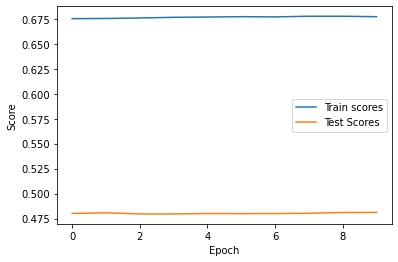

In [276]:
# ANSWER Q7 - part 3 - Visualize the results
plotScores(train_scores_mlp, test_scores_mlp)

**ANSWER Q7 - part 4** \
Describe the behaviour of the scores found during the training. Did the train or the test set produce the best results? What do these results mean?

The behaviour of the scores during training yieled very consistent results for both the train set and test set. The train set was very consistent across epochs, approximating a score at around 0.67 with extremely small deviations. The test set was also very consistent across epochs, approximating at a score around 0.48 with very small deviations. However, the train set produced the best results at around 0.67, which the test set did not even come close to. I think these results mean that the model is overfitted. Thus, the model matches the training data too well, and is unable to generalize on the test data to predict accurate results. 

**ANSWER Q7 - part 5** \
Did the MLP do better or worse than the Baseline Logistic Regression Model (and by how much)? Why do you think that it did better/worse?

I think that the MLP did worse than the Baseline Logistic Regression Model because the test set score of the MLP was lower than the test set score for the Baseline Logistic Regression Model. The MLP approximated a test score of around 0.48, and the Baseline Logistic Regression Model approximated a test of around 0.53, so the Baseline Logistic Model was better by approximately 0.05. I think the MLP did worse because it overfitted, since the score for the train set was significantly higher than the score for the test set. Furthermore, the score for the test set and train set for the Baseline Logistic Model were very similar, which is a good indicator that the model was not overfitted and, thus, another reason that it performed better than the MLP.

**7. Trying a slightly different model with different feature selection**  
Now that we have run through the Baseline and the MLP classifiers, let us try one more MLP with a different feature selection. This time you will be creating the model by with random features to use from our original list of features. A random selection is certainly not what we should do in a real context, but for the sake of comparing results of different feature sets, within this notebook, this will work well.  The following TO DO gives an overview of the entire task.

**(TO DO) Q8 - 6 marks**   

You will retrain a MLP classifier using 4 random features instead of the ones we used above.

1.   Insert a seed of your choice for the randomization.  
2.   Create a new list of features containing a random four features from featureSet, we call this list randomFeatures.
3.   Then use that list to complete the encoding process using ohe_rand.   
4.   Once done, use the train_and_evaluate() function to train the model. 
5.   Plot the results. 
6.   Finally compare the test results from clf_rand (obtained here) with the results from clf_mlp (state which did better, posting the scores and the random feature set selected).

In [307]:
# ANSWER Q8

import random

# Setup a seed
random.seed(20)

# Setting up our one-hot encoder
ohe_rand = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Since the dataset is quite large, try with a subset of features
featureSet = ['race','gender','age', 'weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
 'num_medications']

# TO DO - Select a random four unique features from the list featureSet
randomFeatures = [random.choice(featureSet) for i in range(4)]
print(randomFeatures)

# TO DO - Finish the remaining encoding process
X_train_r = X_train[featureSet].copy()
X_test_r = X_test[featureSet].copy()
ohe.fit(X_train_r)

feature_names_r = ohe.get_feature_names()

X_train_r_encoded = ohe.transform(X_train_r)
X_test_r_encoded = ohe.transform(X_test_r)

['age', 'time_in_hospital', 'gender', 'num_lab_procedures']


Starting training...
Epoch:1/10 -- 2021-11-02 05:25:18.076026
Epoch:2/10 -- 2021-11-02 05:26:23.476438
Epoch:3/10 -- 2021-11-02 05:27:34.114320
Epoch:4/10 -- 2021-11-02 05:28:45.529492
Epoch:5/10 -- 2021-11-02 05:29:58.032744
Epoch:6/10 -- 2021-11-02 05:31:09.542843
Epoch:7/10 -- 2021-11-02 05:32:20.202533
Epoch:8/10 -- 2021-11-02 05:33:29.172802
Epoch:9/10 -- 2021-11-02 05:34:38.573665
Epoch:10/10 -- 2021-11-02 05:35:47.429256
Done training.
train scores: [0.6189013904584091, 0.6439345551024419, 0.6556035965213973, 0.6607871075517123, 0.6642018375669434, 0.6665356458507345, 0.6683289932688056, 0.6692870829853093, 0.6710312975974058, 0.6721859185378077] 
test scores: [0.49955782647145525, 0.4878156627689889, 0.484573056892994, 0.4809865382725754, 0.48093740788051487, 0.47951262651075954, 0.4778421931807016, 0.4780878451410042, 0.4781369755330648, 0.4790213225901543]


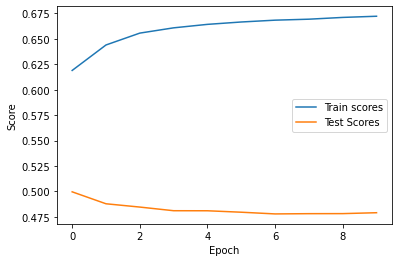

In [284]:
# ANSWER Q8 (continue)
clf_rand = MLPClassifier(solver='lbfgs',  hidden_layer_sizes=(100), random_state=1, warm_start=True)

# TO DO - Train the model (this will take a little while! Grab a snack or find something to do), plot the results
train_scores_r, test_scores_r = train_and_evaluate(clf_rand, X_train_r_encoded, y_train, X_test_r_encoded, y_test, 10)
print("train scores: {} \ntest scores: {}".format(train_scores_r, test_scores_r))
plotScores(train_scores_r, test_scores_r)

**ANSWER Q8 (continue)**

State the random feature set obtained. Compare the train and test results from clf_rand to clf_mlp, posting the scores from both.

The random feature set obtained is: ['age', 'time_in_hospital', 'gender', 'num_lab_procedures']

<table>
    <tr>
        <th></th><th>cld_rand train scores</th><th>clf_mlp train scores</th><th>cld_rand test scores</th><th>clf_mlp test scores</th>
    </tr>
    <tr><td>epoch 1</td><td>0.6189013904584091</td><td>0.6751953029037489</td><td>0.49955782647145525</td><td>0.4801021912154859</td></tr>
    <tr><td>epoch 2</td><td>0.6439345551024419</td><td>0.6753672677246597</td><td>0.4878156627689889</td> <td>0.48069175592021224</td></tr>
    <tr><td>epoch 3</td><td>0.6556035965213973</td><td>0.6758954453888861</td><td>0.484573056892994</td>  <td>0.4796108872948806</td></tr>
    <tr><td>epoch 4</td><td>0.6607871075517123</td><td>0.6765341718665553</td><td>0.4809865382725754</td> <td>0.4796108872948806</td></tr>
    <tr><td>epoch 5</td><td>0.6642018375669434</td><td>0.6768412519038962</td><td>0.48093740788051487</td><td>0.48000393043136486</td></tr>
    <tr><td>epoch 6</td><td>0.6665356458507345</td><td>0.6771728983442244</td><td>0.47951262651075954</td><td>0.4799056696472438</td></tr>
    <tr><td>epoch 7</td><td>0.6683289932688056</td><td>0.6769640839188326</td><td>0.4778421931807016</td> <td>0.48000393043136486</td></tr>
    <tr><td>epoch 8</td><td>0.6692870829853093</td><td>0.6776150935979954</td><td>0.4780878451410042</td> <td>0.4802495823916675</td></tr>
    <tr><td>epoch 9</td><td>0.6710312975974058</td><td>0.6776150935979954</td><td>0.4781369755330648</td> <td>0.48103566866463593</td></tr>
    <tr><td>epoch 10</td><td>0.6721859185378077</td><td>0.6771360487397435</td><td>0.4790213225901543</td> <td>0.481133929448757</td></tr>
</table>

When comparing the results for the train sets between the clf_rand and clf_mlp, the clf_rand appears to perform slightly worse than the clf_mlp, with the majority of score decreases of approximately 0.1, and the biggest score decrease of approximately 0.056 occurring at epoch 1. Thus, the clf_mp performed marginally better for the train set.

When comparing the results for the test sets between the clf_rand and clf_mlp, it does not appear that either algorithm performs better than the other. Each algorithm seems to have an even distribution of improvements over the other at different epochs of about 0.01.

Furthermore, both algorithms appear to have better results for their train sets than their test sets, in spite of the feature vectors chosen. 

**8. Gradient Descent and error curve**  
We will do one final training of a MLP, but this time we will use solver="SGD". Using the gradient descent, as you've learned it, allows us to look at the error (loss) curve during its training, as well as discuss different parameters, as we saw them in the video lectures.

In [285]:
clf_sgd = MLPClassifier(solver='sgd', alpha=1e-4, hidden_layer_sizes=(50,50), random_state=1, max_iter=300, learning_rate_init=0.1, warm_start=True)

**(TO DO) Q9 - 2 marks**

Explain **in your own words** the parameters chosen above. What do they all mean and explain how the chosen values for each parameter will affect the model. For any that are unfamiliar, explore the official documentation and just provide a short sentence on what the parameter does based on its description and your existing knowledge.

**ANSWER Q9**  

*solver:* This parameter indicates the solver used to optimize the weights. In this case, "sgd" means the stochastic gradient descent solver is used.

*alpha:*  This parameter is used for the regularization of the weights.

*hidden_layer_size:* This parameter indicates the number of hidden layers and the nodes per layer. In this case (50,50) means that there are 2 hidden layers with 50 neurons each in the first layer and second layer.

*random_state:*  This parameter indicates the random number generated for weights and the initialization of the bias. If early stopping is used, it will determine the train-test split. When the solver parameter is "sgd" or "adam", it determines the batch sampling. An int is used to obtain reproducible results across multiple function calls.

*learning_rate_init:* This parameter is used to set the learning rate only when the solver parameter is "sgd" or "adam"

*warm_start:* This parameter is used to indicate if the learner will use weights from a previous solution. Setting it to True means it will use weights from a previous solution for the model. False means that random weights will be used.

In [286]:
# Plots the loss from the trained model
# NOTE: clf.loss_curve_ only exists when using solver="SGD"
def plot_loss(clf):
    plt.plot(clf.loss_curve_)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

**(TO DO) Q10 - 2 marks**   
Train and evaluate the model using train_and_evaluate (for 1 epoch, using X_train_sf_encoded and X_test_sf_encoded). Display the plot exhibiting the loss function when being trained. Briefly describe what the loss function represents (and why it's important).

Starting training...
Epoch:1/1 -- 2021-11-02 20:53:37.089441
Done training.
train scores: [0.6460841153638285] 
test scores: [0.4867839245357178]


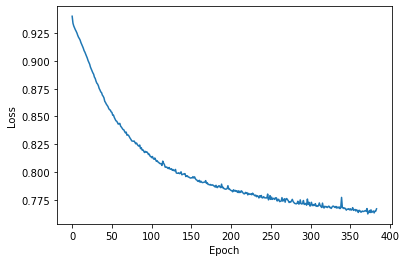

In [289]:
# ANSWER Q10 -
# Train the model for *1 epoch* (with X_train_sf_encoded and X_test_sf_encoded)
train_scores_sgd, test_scores_sgd = train_and_evaluate(clf_sgd, X_train_sf_encoded, y_train, X_test_sf_encoded, y_test, 1)
print("train scores: {} \ntest scores: {}".format(train_scores_sgd, test_scores_sgd))
# Plot the loss of clf_sgd
plot_loss(clf_sgd)

**ANSWER Q10 - (continue)**\

The loss curve represents a model's error over time. For example, as the model gets better at learning, its error will decrease over time. It is important because it can be used as a measurement of a model's performance. Furthermore, it can be used to determine if the model is overfitted. If the error for the training set continues to decrease, but the error for the test set starts to diverge and increase, that is an indicator that the model is overtraining and the model is mimicking the training data. Thus, the model will not make accurate predictions when used on test data or actual data. 